In [ ]:
import numpy as np
import matplotlib.pyplot as plt

!pip install opencv-python
import cv2

In [ ]:
from google.colab.patches import cv2_imshow # for image display

# Homography

In [ ]:
#load images

h1 = cv2.imread("/content/hallway1.jpg").astype('float32')
h2 = cv2.imread("/content/hallway2.jpg").astype('float32')
h3 = cv2.imread("/content/hallway3.jpg").astype('float32')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4436cc9190>,
 <matplotlib.image.AxesImage at 0x7f44371a7310>)

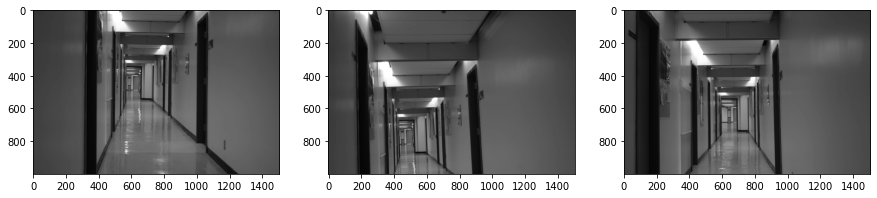

In [ ]:
#convert to gray scale
h1_gray = cv2.cvtColor(h1, cv2.COLOR_BGR2GRAY)
h2_gray = cv2.cvtColor(h2, cv2.COLOR_BGR2GRAY)
h3_gray = cv2.cvtColor(h3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1), plt.imshow(h1_gray, cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(h2_gray, cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(h3_gray, cmap = 'gray')


In [ ]:
h1_h2_wall = [[[1062,12],[902,331]],
              [[1094,178],[944,488]],
              [[849,448],[716,765]],
              [[822,645],[701,976]],
              [[855,212],[709,531]],
              [[720,538],[592,861]]]

h1_h3_wall = [[[1062,12],[935,204]],
              [[1094,178],[962,365]],
              [[849,448],[826,638]],
              [[822,645],[815,837]],
              [[855,212],[824,404]],
              [[720,538],[753,731]]]

h1_h3_floor = [[[715,558],[743,752]],
                 [[596,494],[650,690]],
                 [[576,494],[630,690]],
                 [[610,488],[666,682]],
                 [[760,687],[735,885]]]


In [ ]:
#show the selected points
from matplotlib.patches import Rectangle
#colors = [(235, 52, 52),[235, 183, 52],[211, 235, 52],[110, 235, 52],[52, 235, 223], [92, 52, 235]]
#colors = [(235, 52, 52),[235, 183, 52],[211, 235, 52],[110, 235, 52],[52, 235, 223], [92, 52, 235]]
def show_points(img1, img2, matches, size,colors):
    n = size/2
    c = 0
    for i in matches:
        #print(i)
        #print(i[0][0]-n)
        #print(colors[c])
        #cv2.rectangle(img1, (int(i[0][0]-n), i[0][1]-n),(i[0][0]+n, i[0][1]+n),(52, 235, 223), 1)
        cv2.rectangle(img1, (int(i[0][0]-n), int(i[0][1]-n)),(int(i[0][0]+n), int(i[0][1]+n)),(235, 52, 52),10)
        cv2.rectangle(img2, (int(i[1][0]-n), int(i[1][1]-n)),(int(i[1][0]+n), int(i[1][1]+n)),(235, 52, 52),10)
        c+=1


    plt.figure(figsize=(15,15))
    fig1, ax1 = plt.subplot(1,2,1),plt.imshow(img1, cmap = 'gray' )
    fig2, ax2 = plt.subplot(1,2,2), plt.imshow(img2, cmap = 'gray')


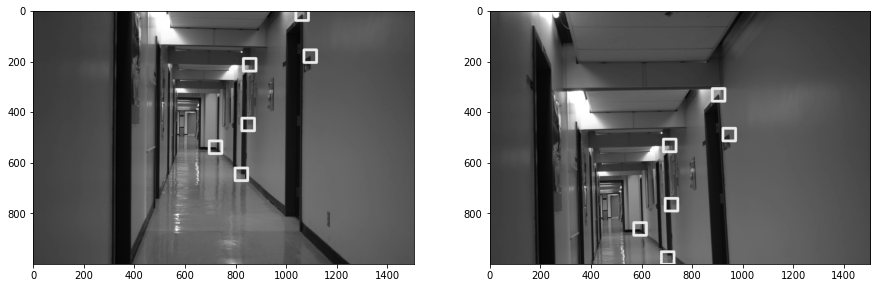

In [ ]:
#case 1
show_points(h1_gray.copy(), h2_gray.copy(), h1_h2_wall, 50, colors)

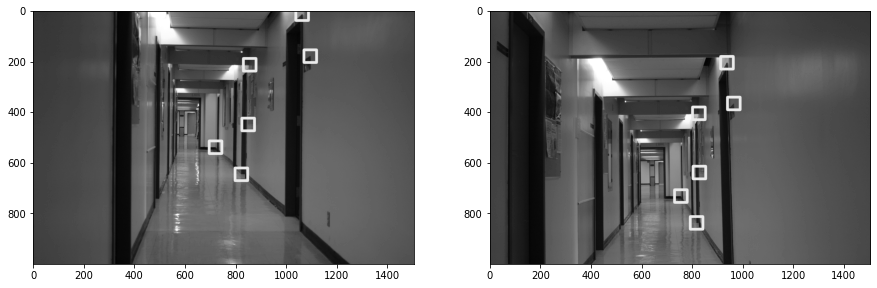

In [ ]:
#case 2
show_points(h1_gray.copy(), h3_gray.copy(), h1_h3_wall, 50, colors)

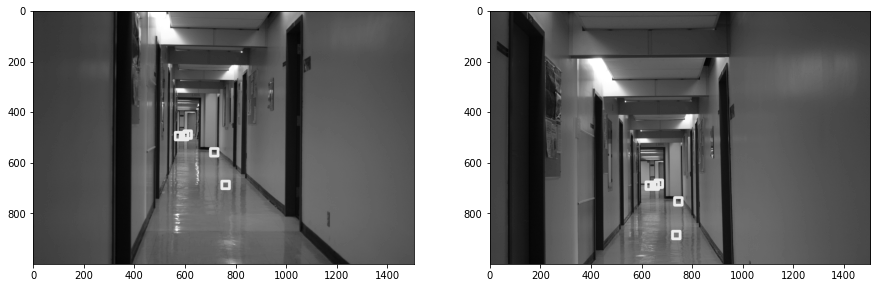

In [ ]:
#case 3
show_points(h1_gray.copy(), h3_gray.copy(), h1_h3_floor, 30, colors)

Function for computing homography by A^TA

In [ ]:
def get_homo(matches):
    A = []
    for i in matches:
        (x, y) = i[0]
        (a, b) = i[1]
        A.append([x,y,1,0,0,0,-x*a, -a*y, -a])
        A.append([0,0,0,x,y,1,-b*x, -b*y, -b])

    A  = np.array(A)
    w, v = np.linalg.eig(np.dot(A.T, A))
    idx = np.argmin(w)
    h = v[:,idx]
    #print(A.shape)
    #print(h)
    #print( np.dot(A,h))
    h = h.reshape((3,3))
   
    return h
    
def compute(homo, img):
    result = cv2.warpPerspective(img,homo, (img.shape[1], img.shape[0]))
    plt.axis('off')
    plt.imshow(result, cmap = 'gray')
    #plt.savefig(filename)
    return result

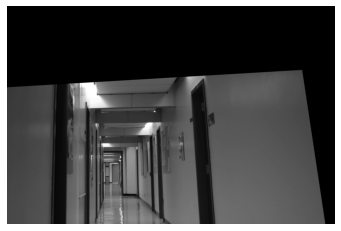

In [ ]:
#case 1
homo1 = get_homo(h1_h2_wall)
img1 = compute(homo1, h1_gray)


In [ ]:
print(img1.shape)

(1000, 1504)


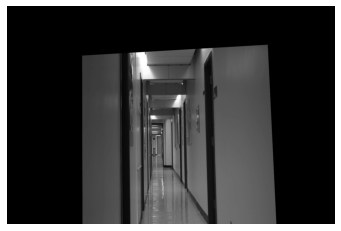

In [ ]:
#case 2
homo2 = get_homo(h1_h3_wall)
img2 = compute(homo2, h1_gray)

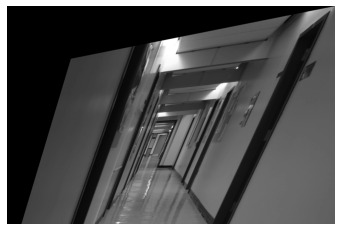

In [ ]:
#case 3
homo3 = get_homo(h1_h3_floor)
img3 = compute(homo3, h1_gray)

In [ ]:
cv2.imwrite('case1.jpg', img1)
cv2.imwrite('case2.jpg', img2)
cv2.imwrite('case3.jpg', img3)

True

In [ ]:
print(homo1)
print(homo2)
print(homo3)

[[ 2.14661237e-03 -1.07366018e-04 -1.27943668e-01]
 [-2.13170996e-04  2.11965506e-03  9.91773305e-01]
 [-2.32433043e-07 -3.25284294e-07  2.64023970e-03]]
[[ 1.27517594e-03 -3.72028418e-05  8.34495631e-01]
 [-9.47910150e-05  2.22595303e-03  5.51003242e-01]
 [-8.13892153e-08 -1.21481001e-07  2.42439235e-03]]
[[-1.91879821e-03  6.85923188e-04 -7.71066227e-01]
 [ 5.93252102e-04 -2.81113621e-03 -6.36739764e-01]
 [ 7.04005377e-07 -4.26430964e-07 -2.63421991e-03]]


-----------------------------------REPORT---------------------------------------

Above are the homography for three cases.

Effects:

Homo1: rotation counterclockwise and scaled to be a bit larger

Homo2: scaled to be smaller, sheared

Homo3: the major effect is shearing


In [ ]:
def fit_posotion(points, homo):
    homo = homo.reshape(-1)
    print(homo.shape)
    new_positions = []
    for p in points:
        (x,y) = p
        new_px = (homo[0]*x+homo[1]*y+homo[2])/(homo[6]*x+homo[7]*y+homo[8])
        new_py = (homo[3]*x+homo[4]*y+homo[5])/(homo[6]*x+homo[7]*y+homo[8])
        new_positions.append([new_px, new_py])

    return new_positions



(9,)


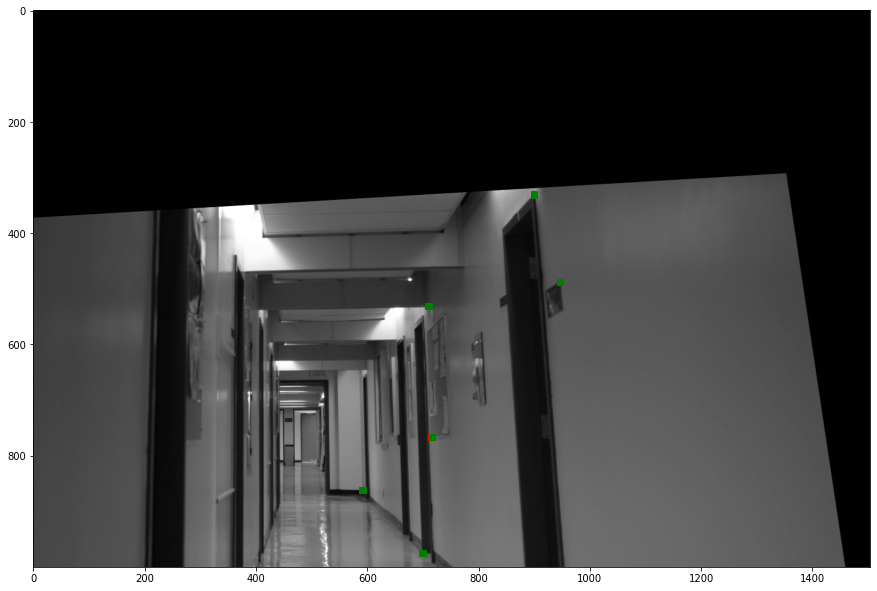

In [ ]:
#selected points
selected_case1 =[[900,330],[947,488],[715,767],[699,975],[710,530],[591,861]]

plt.figure(figsize=[15,15])
plt.imshow(img1, cmap = 'gray')
greens_case1 = fit_posotion(np.array(h1_h2_wall)[:,0], homo1)

for p in selected_case1:
    (x,y) = p
    plt.plot(x,y,'rs')

for p in greens_case1:
    (x,y) = p
    plt.plot(x,y,'gs')


The result for case 1 is very close. Please zoom in to find the red squares. 

(9,)


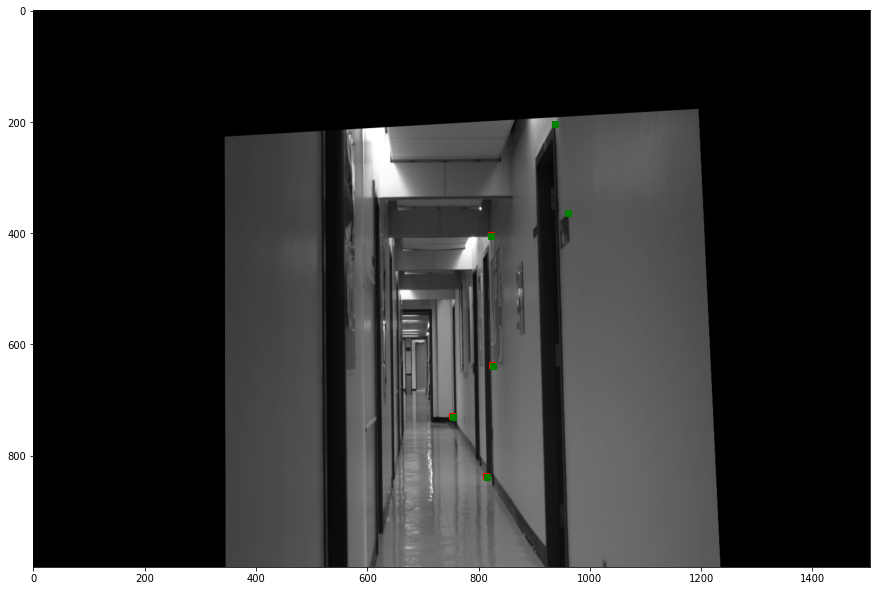

In [ ]:
#selected points
selected_case2 =[[937,203],[961,363],[825,637],[814,836],[822,404],[752,729]]

plt.figure(figsize=[15,15])
plt.imshow(img2, cmap = 'gray')
greens_case1 = fit_posotion(np.array(h1_h3_wall)[:,0], homo2)

for p in selected_case2:
    (x,y) = p
    plt.plot(x,y,'rs')

for p in greens_case1:
    (x,y) = p
    plt.plot(x,y,'gs')


(9,)


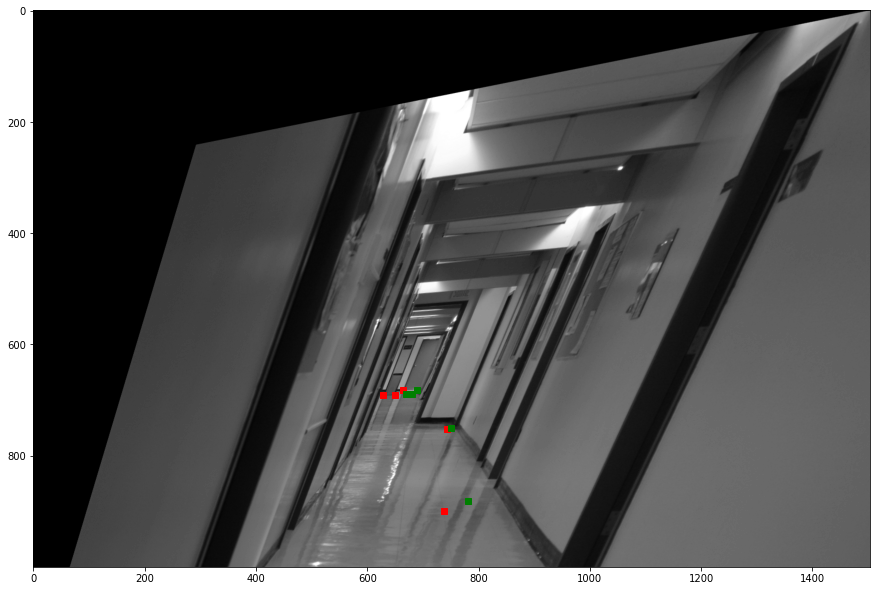

In [ ]:
#selected points
selected_case3 =[[743,752],[649,690],[629,690],[665,682],[737,900]]

plt.figure(figsize=[15,15])
plt.imshow(img3, cmap = 'gray')
greens_case1 = fit_posotion(np.array(h1_h3_floor)[:,0], homo2)

for p in selected_case3:
    (x,y) = p
    plt.plot(x,y,'rs')

for p in greens_case1:
    (x,y) = p
    plt.plot(x,y,'gs')

In [ ]:
def mapping(img1, img2,homo):
    new_img = np.zeros([1500,2200,3],dtype=np.uint8)
    (x,y,z) = img1.shape
    img1 = np.array
    new_img[int(750-x/2):int(750+x/2),int(1100-y/2): int(1100+y/2)][2] = img1[:,:,2]
    cv2_imshow(new_img)

    return None